# Kelompok
# 1. Nia Ayu Agustin (24031554081)
# 2. Siti Aisyah Febriyanti (24031554158)
# 3. Audy Alycia (24031554179)
# Kelas: 2024A

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset UCI
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"

# Nama kolom sesuai spambase.names
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
    'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
    'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
    'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
    'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
    'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
    'char_freq_$', 'char_freq_#',
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',
    'spam'
]

df = pd.read_csv(data_url, header=None, names=column_names)

print("Jumlah data:", df.shape)
df.head()


Jumlah data: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
df.to_csv("spambase.csv", index=False)

In [ ]:
df = pd.read_csv("spambase.csv")
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [ ]:
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000



Distribusi Kelas
spam
0    2788
1    1813
Name: count, dtype: int64

Persentase:
spam
0    60.595523
1    39.404477
Name: proportion, dtype: float64


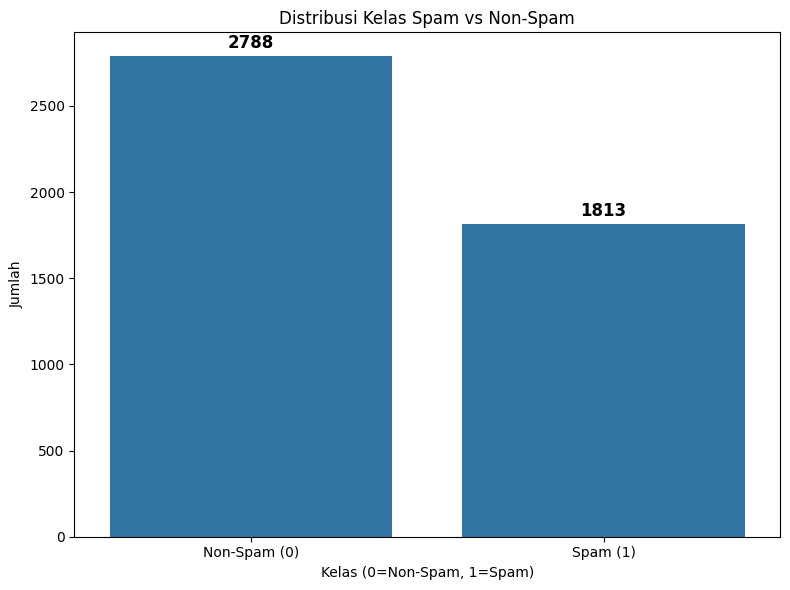

In [ ]:
df = pd.read_csv("spambase.csv")

# Cek distribusi kelas (balance atau tidak)
print("\nDistribusi Kelas")
print(df['spam'].value_counts())
print("\nPersentase:")
print(df['spam'].value_counts(normalize=True) * 100)

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=df)
plt.title('Distribusi Kelas Spam vs Non-Spam')
plt.xlabel('Kelas (0=Non-Spam, 1=Spam)')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Non-Spam (0)', 'Spam (1)'])

for i, count in enumerate(df['spam'].value_counts().sort_index()):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Memisahkan fitur dan label
X = df.drop('spam', axis=1)
y = df['spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'ccp_alpha': [0.0, 0.001, 0.01]
}

# Gini
base_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)

grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 1}
Best CV Accuracy: 0.9211956521739131


In [ ]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

In [ ]:
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9120521172638436
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       558
           1       0.90      0.88      0.89       363

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921



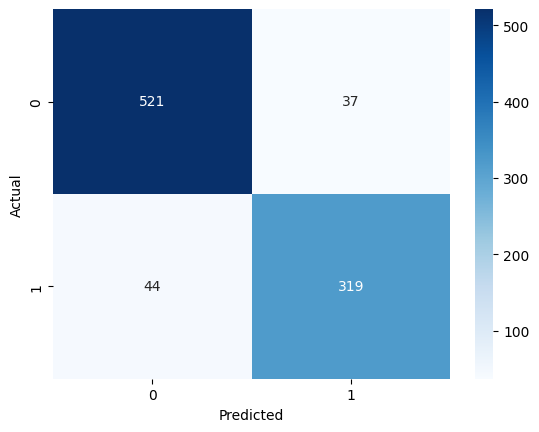

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#  Feature importance analysis
fi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(fi.head(57))

                       Feature  Importance
52                 char_freq_$    0.409136
6             word_freq_remove    0.188576
51                 char_freq_!    0.096652
24                word_freq_hp    0.048165
56    capital_run_length_total    0.044273
15              word_freq_free    0.036715
45               word_freq_edu    0.026914
23             word_freq_money    0.020656
26            word_freq_george    0.020487
4                word_freq_our    0.015763
54  capital_run_length_average    0.015049
16          word_freq_business    0.011761
18               word_freq_you    0.010127
55  capital_run_length_longest    0.007239
44                word_freq_re    0.005980
48                 char_freq_;    0.005713
41           word_freq_meeting    0.005273
17             word_freq_email    0.005109
21              word_freq_font    0.004892
36              word_freq_1999    0.004310
35        word_freq_technology    0.002851
11              word_freq_will    0.002614
3          

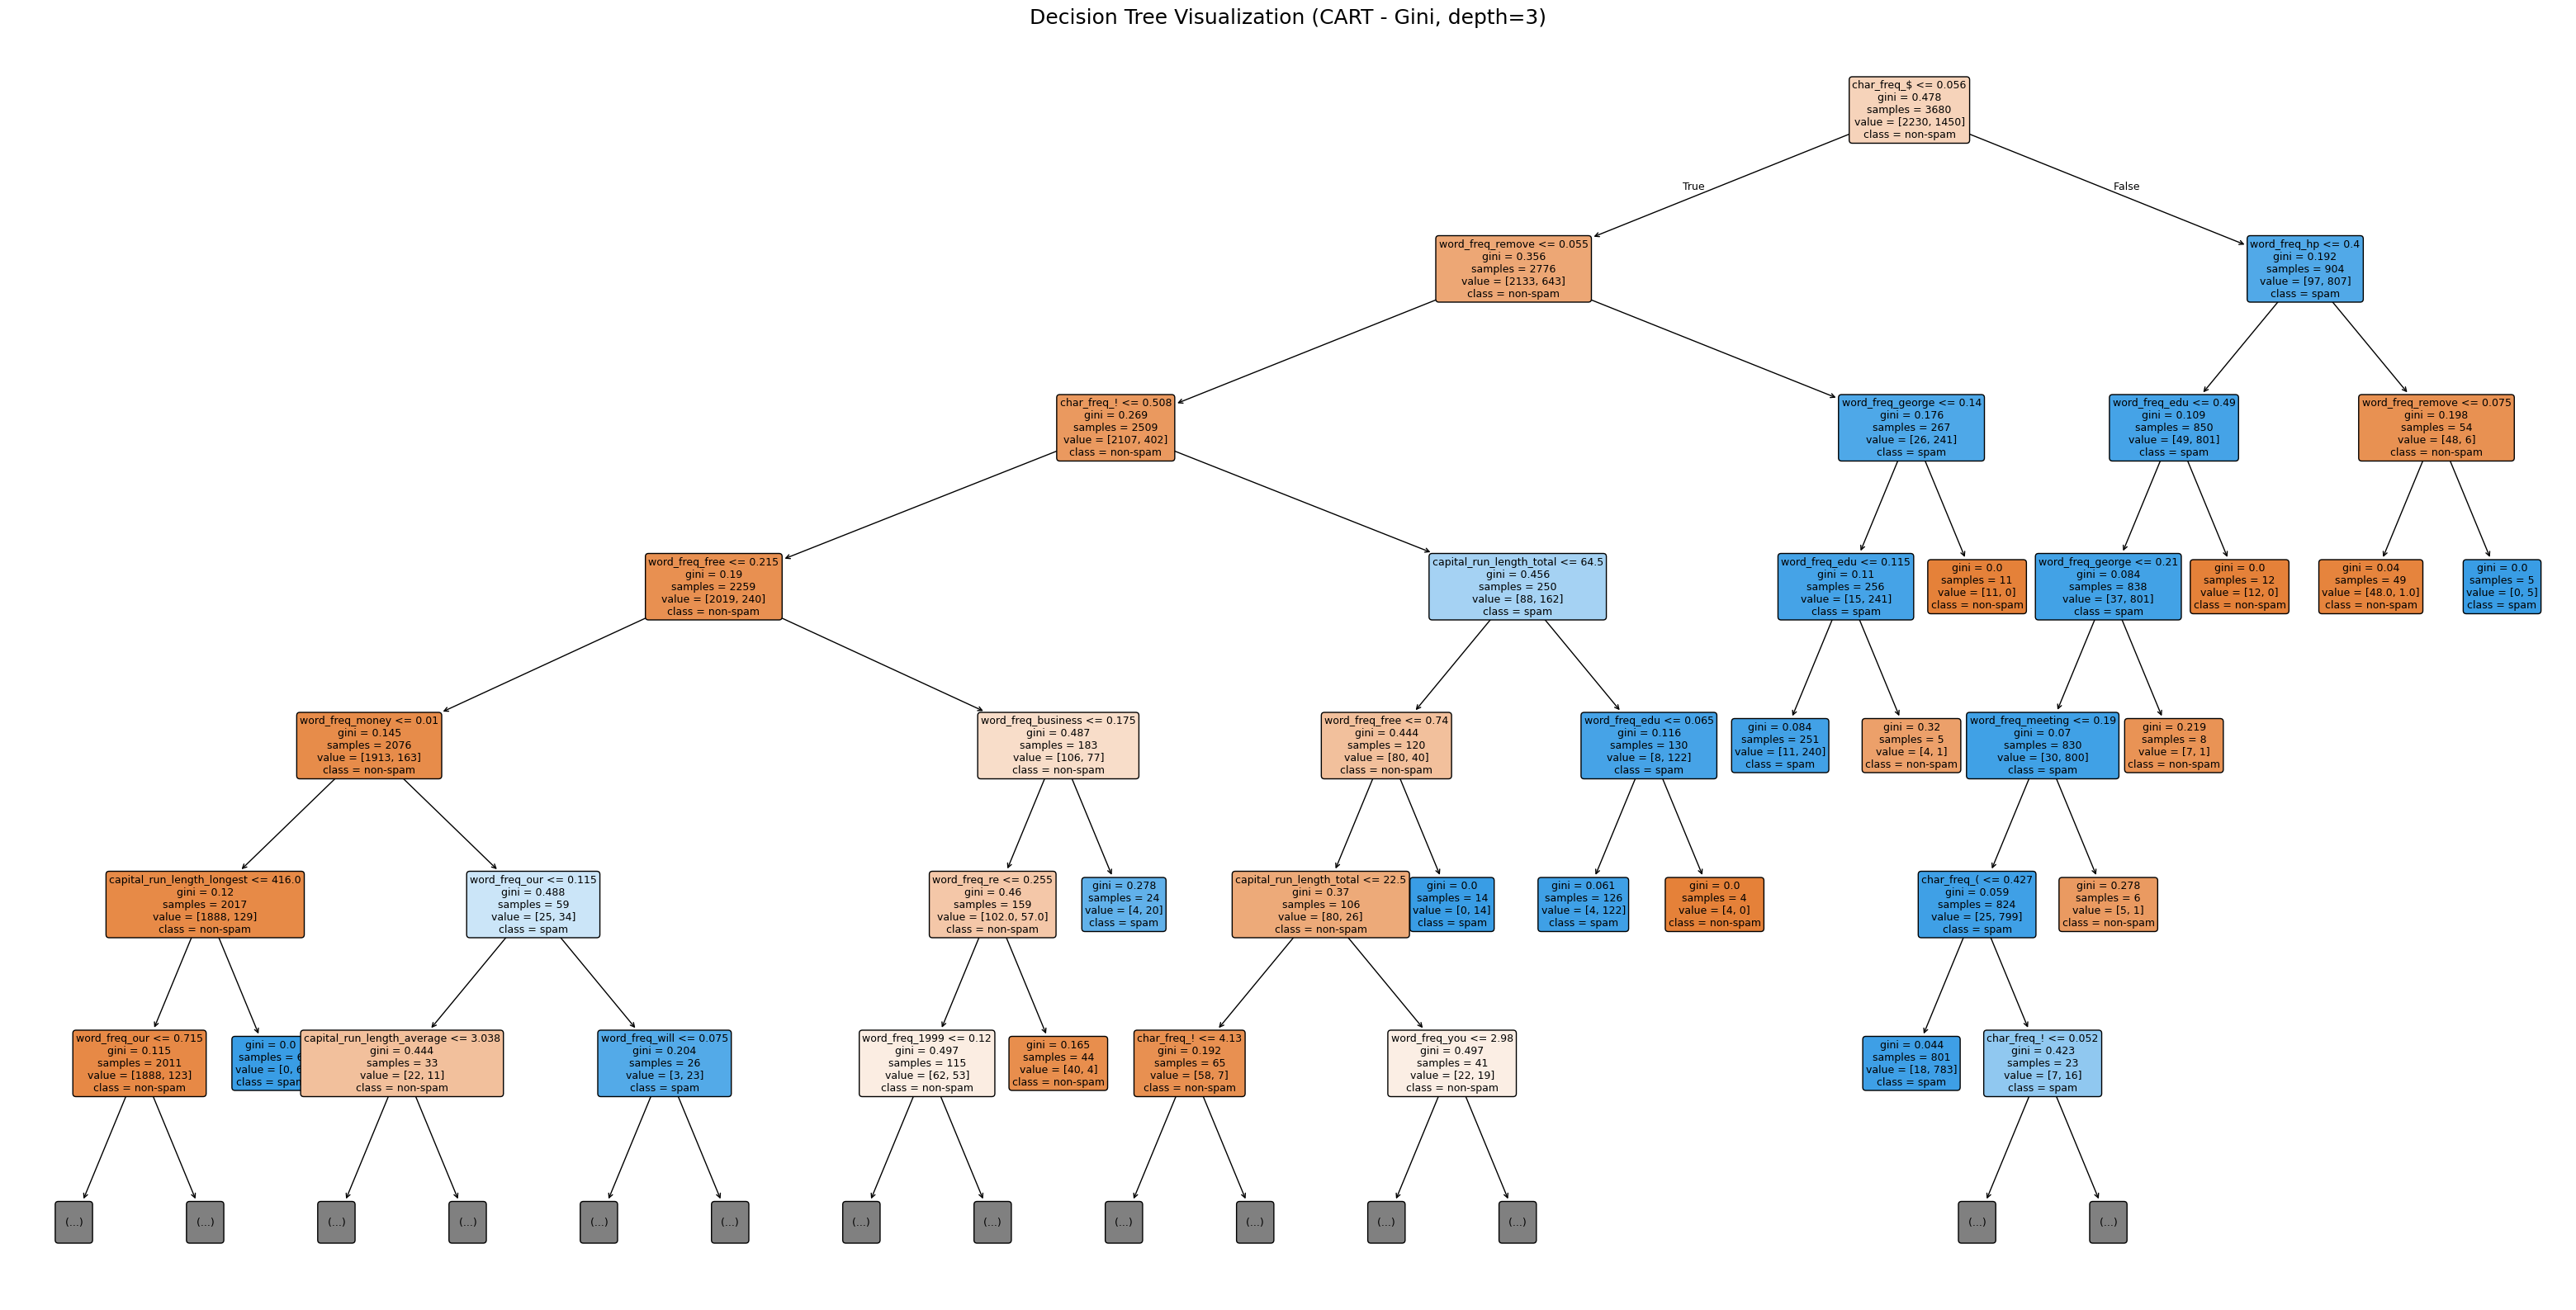

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["non-spam", "spam"],
    filled=True,
    rounded=True,
    max_depth=6,
    fontsize=9
)
plt.title("Decision Tree Visualization (CART - Gini, depth=3)", fontsize=18)
plt.show()


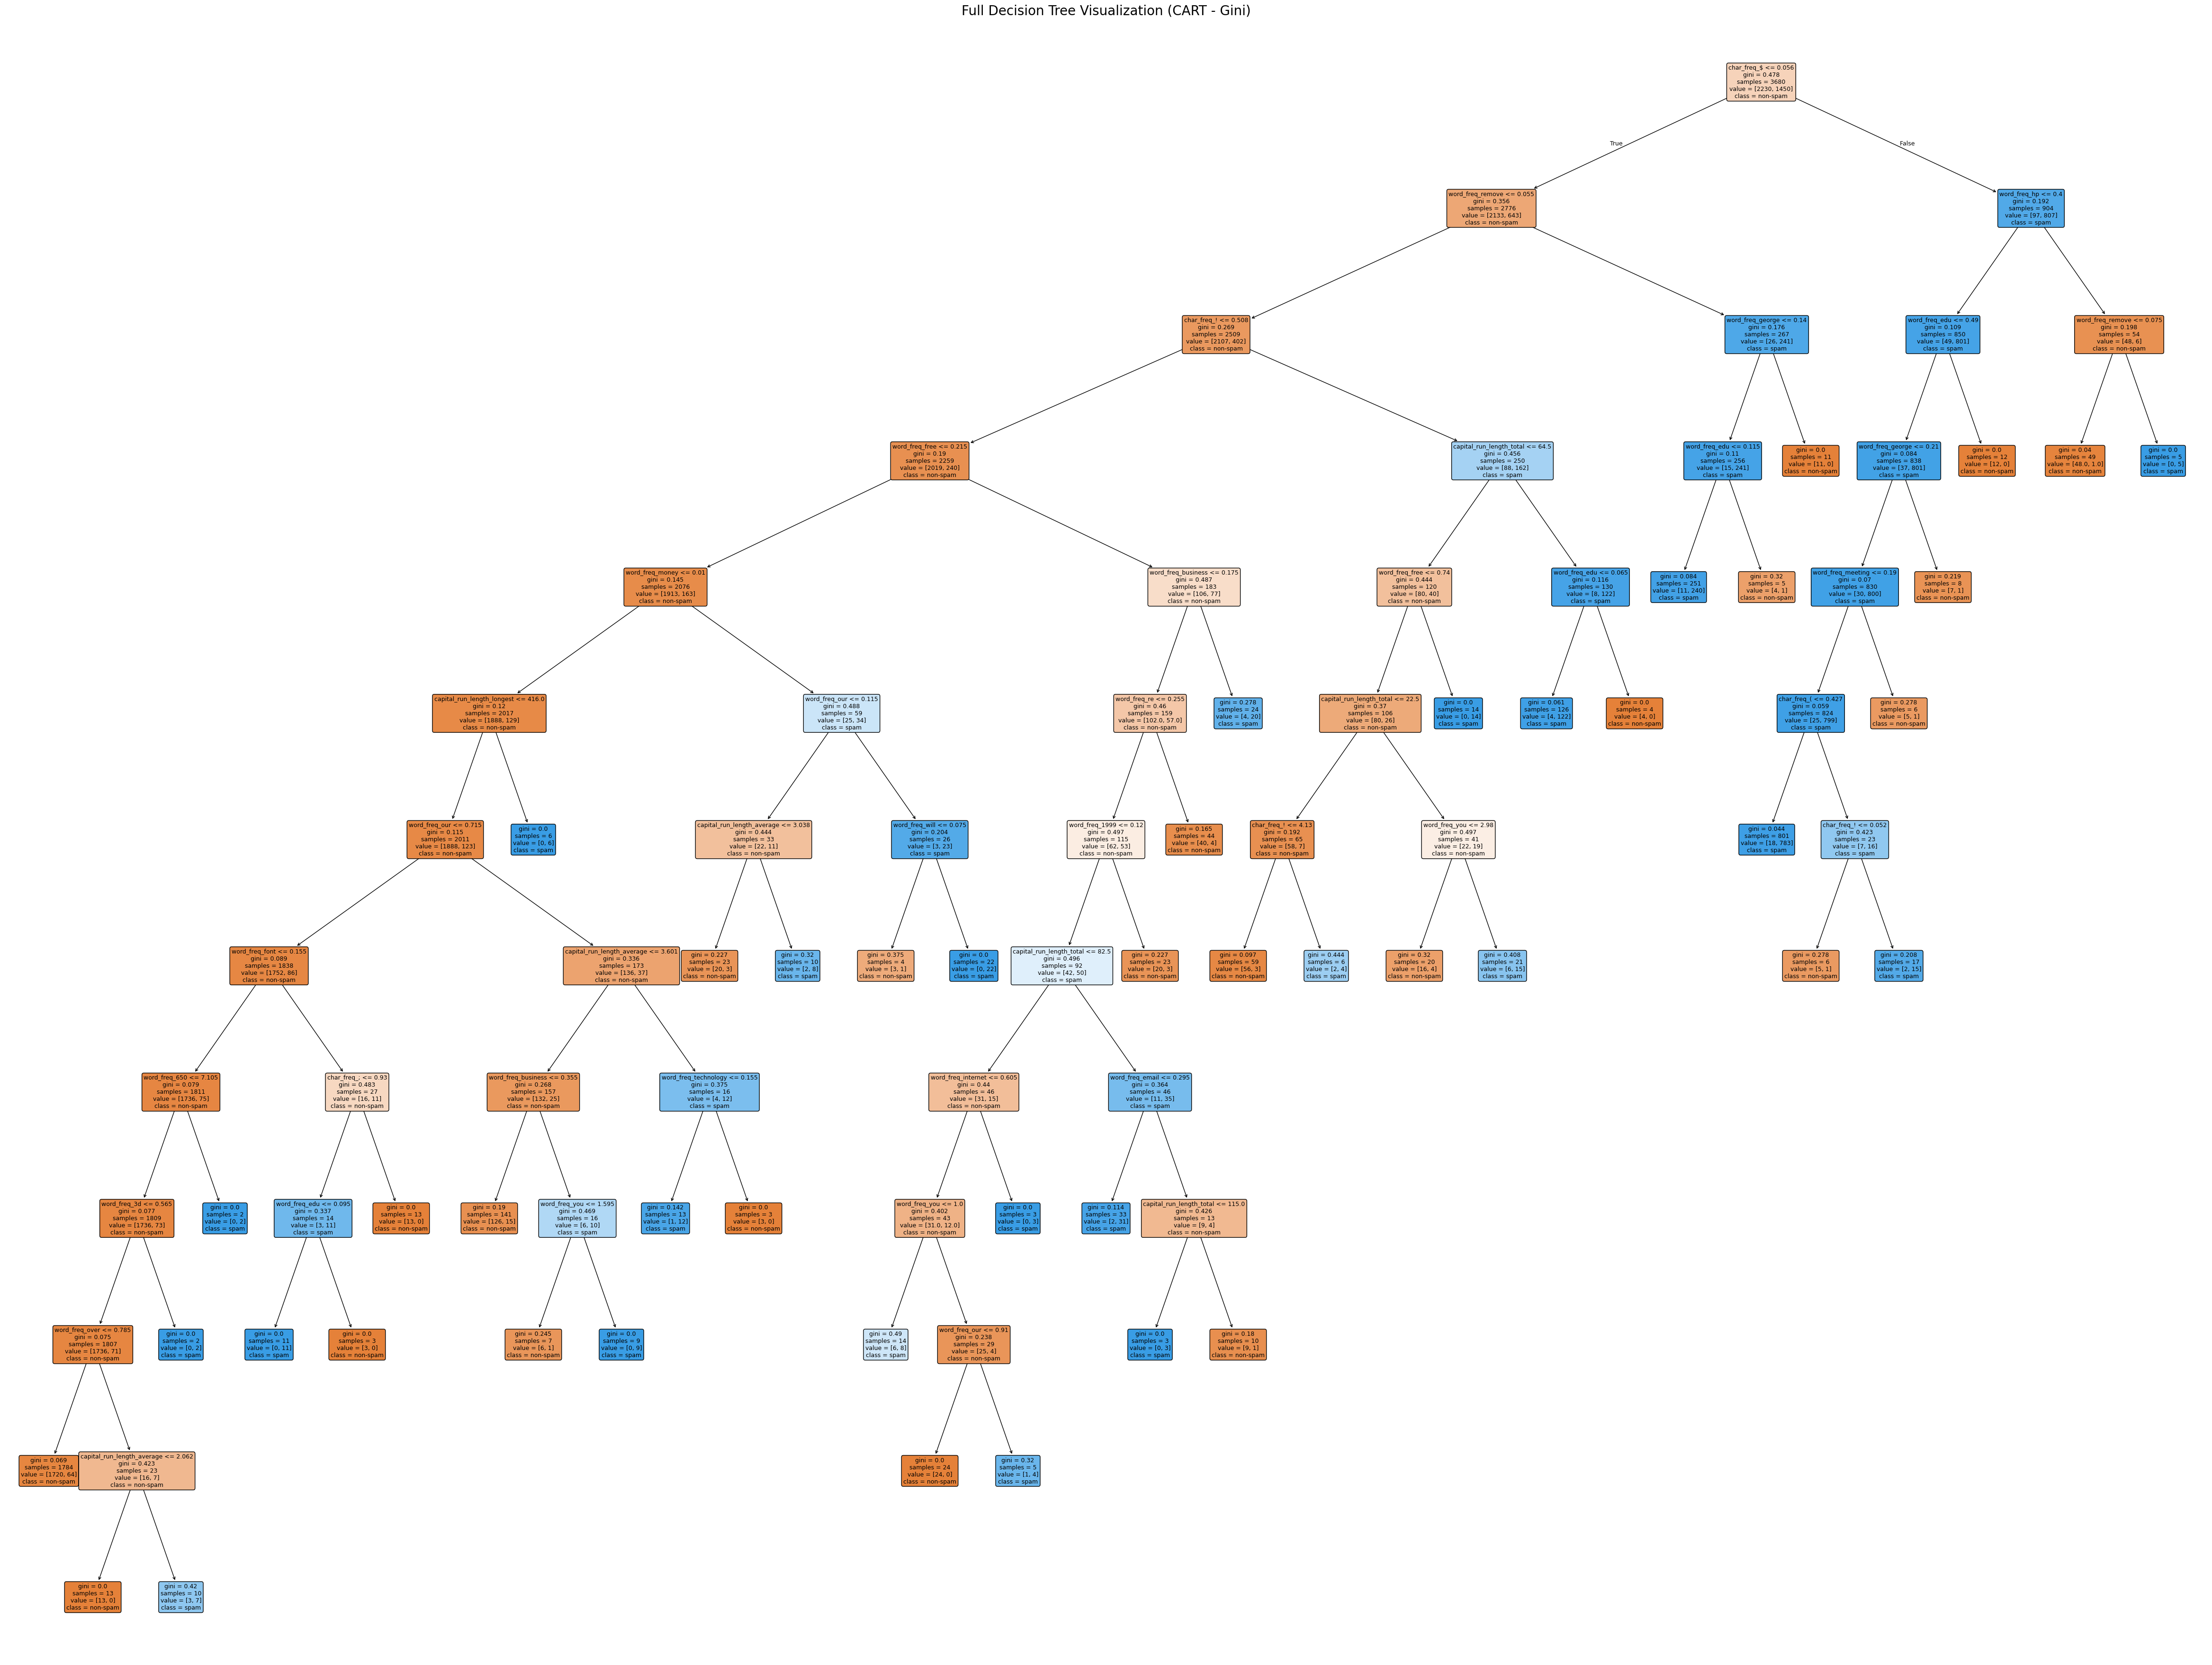

In [ ]:
+

# Membatasi fitur dengan alfa 0,01

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
model_alpha = DecisionTreeClassifier(
    criterion="gini",
    ccp_alpha=0.01,
    random_state=42
)

model_alpha.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [ ]:

y_pred = model_alpha.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8773072747014115

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       558
           1       0.90      0.77      0.83       363

    accuracy                           0.88       921
   macro avg       0.88      0.86      0.87       921
weighted avg       0.88      0.88      0.88       921



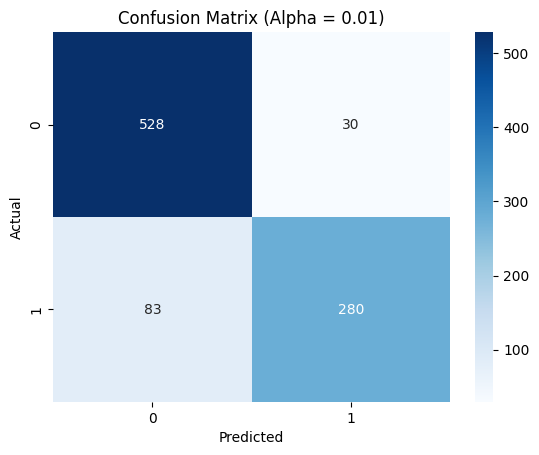

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Alpha = 0.01)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
fi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_alpha.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(fi[fi['Importance'] > 0])


Feature Importance:
                     Feature  Importance
52               char_freq_$    0.518542
6           word_freq_remove    0.231427
51               char_freq_!    0.114952
24              word_freq_hp    0.061045
56  capital_run_length_total    0.039758
15            word_freq_free    0.034276


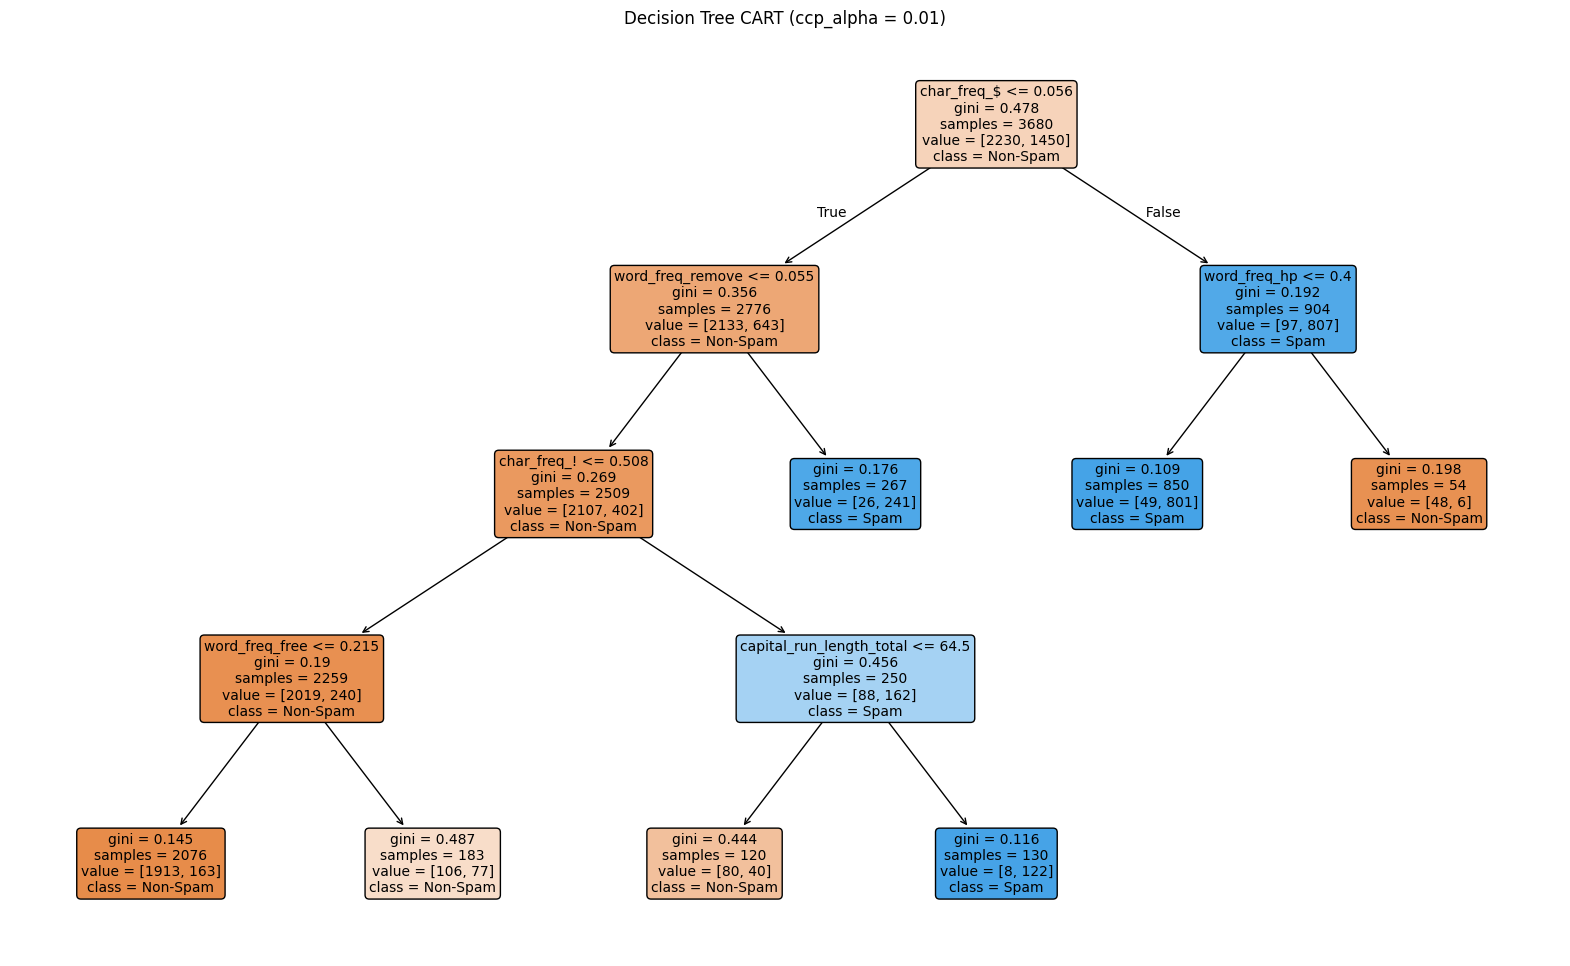

In [ ]:
plt.figure(figsize=(20, 12))
plot_tree(
    model_alpha,
    feature_names=X.columns,
    class_names=["Non-Spam", "Spam"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree CART (ccp_alpha = 0.01)")
plt.show()